<center><h1>Assignment 4B</h1>
<h2> Decision Tree Classifier</h2>
<br>
<p>Apply the Scikit Learn Decision Tree Classifier to the Iris dataset using all three categories and all four feature at once and upload your .ipynb file.
<br>See if your choice of impurity measure makes a difference in your results.</p></center>

In [23]:
from IPython.display import Image
import matplotlib.pyplot as plt
import graphviz
from matplotlib.ticker import MaxNLocator 
%matplotlib inline

import numpy as np 
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [24]:
# read Iris data set
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [25]:
# currently iris has columns names '0'-'4'. We want meaningful names,
# so we will change it.
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
# features: everything except the 'species' column
X = iris.drop('species', axis = 1)

# what are we trying to predict?
y = iris['species']

# split data: 30% will be training data and 70% - test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 101)

<p> Sklearn allows to use 'gini' or 'entropy' as an impurity measure. Also, we can choose to limit tree depth. So, first we will implement 'entropy' with trees of different depths. Then we will implemetn 'gini' and see if there is a difference in performance. 

In [41]:
MaxDepth = 6

def fit_for_var_depth_trees (X_train, y_train, X_test, y_test, criterion_):
    Errors = np.zeros((MaxDepth,2))
    Accuracy = np.zeros(MaxDepth)
    print ("{:^20}{:^20}{:^20}{:^20}".format('Max Depth','Training error','Test error', 'Accuracy'))

    for i in range(0,MaxDepth):
        tree = DecisionTreeClassifier(criterion=criterion_, max_depth=i+1)
        tree.fit(X_train, y_train)

        # tree.score returns the mean accuracy on the given test data and labels 
        # find errors
        Errors[i,0] = 1 - tree.score(X_train,y_train)
        Accuracy[i] = tree.score(X_test,y_test)
        Errors[i,1] = 1 - Accuracy[i]

        
        print("{:^20d}{:^20f}{:^20f}{:^20f}".format(i+1, Errors[i,0], Errors[i,1], Accuracy[i]))
    return Errors, tree

In [42]:
# text format 
bold_start = "\033[1m"
bold_end = "\033[0;0m"

# implement 'entropy' as impurity measure and fit the model
print ('\n'+bold_start + 'Entropy as impurity measure'+ bold_end+ '\n')
ErrorsE, treeE = fit_for_var_depth_trees (X_train, y_train, X_test, y_test, 'entropy') 

# implement 'gini' as impurity measure and fit the model
print ('\n'+bold_start + 'Gini as impurity measure'+ bold_end+ '\n')
ErrorsG, treeG = fit_for_var_depth_trees (X_train, y_train, X_test, y_test, 'gini')


Entropy as impurity measure

     Max Depth         Training error        Test error           Accuracy      
         1                0.253333            0.413333            0.586667      
         2                0.040000            0.040000            0.960000      
         3                0.026667            0.013333            0.986667      
         4                0.000000            0.026667            0.973333      
         5                0.000000            0.026667            0.973333      
         6                0.000000            0.026667            0.973333      

Gini as impurity measure

     Max Depth         Training error        Test error           Accuracy      
         1                0.253333            0.413333            0.586667      
         2                0.040000            0.040000            0.960000      
         3                0.026667            0.013333            0.986667      
         4                0.000000            0.0266

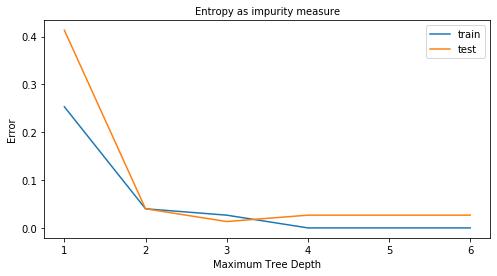

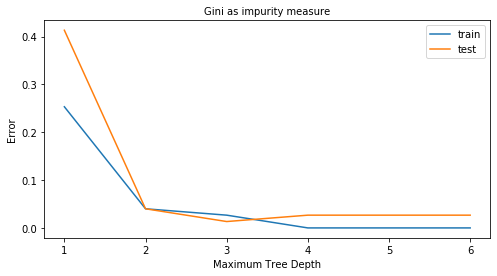

In [43]:
# plot errors by tree depth    
def plot_errors_by_tree_depth(title, Errors):
    plt.close('all')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
    ax.set_xlabel('Maximum Tree Depth')
    ax.set_ylabel('Error')
    ax.set_title(title, fontsize ='medium')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
    ax.legend(loc='upper right', fontsize='medium')
    plt.show() 
    
plot_errors_by_tree_depth('Entropy as impurity measure', ErrorsE)
plot_errors_by_tree_depth('Gini as impurity measure', ErrorsG)

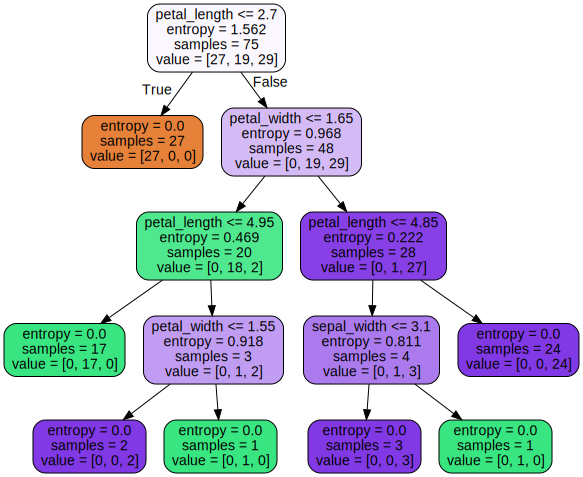

In [44]:
# display the tree
combined_X = np.vstack((X_train, X_test))
combined_y = np.hstack((y_train, y_test))
zE = treeE.apply(combined_X)
dpE = treeE.decision_path(combined_X)
zG = treeG.apply(combined_X)
dpG = treeG.decision_path(combined_X)

export_graphviz(treeE, out_file='T1.dot', feature_names=['sepal_length','sepal_width','petal_length','petal_width'], filled=True, rounded=True)
with open('T1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


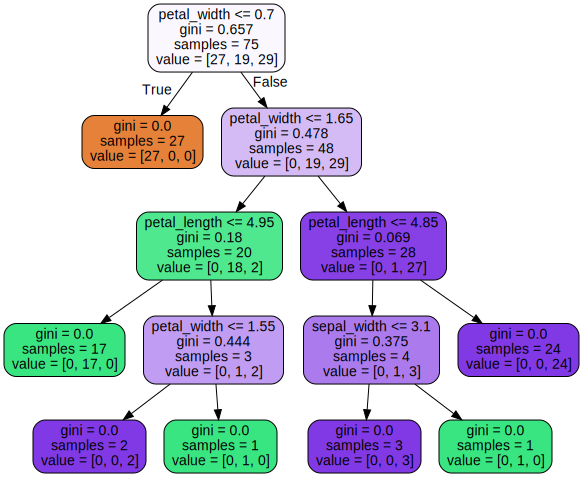

In [45]:
export_graphviz(treeG, out_file='T2.dot', feature_names=['sepal_length','sepal_width','petal_length','petal_width'], filled=True, rounded=True)
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

<h3> Split data to leave 70% of the original set for testing</h3>


Entropy as impurity measure

     Max Depth         Training error        Test error           Accuracy      
         1                0.355556            0.323810            0.676190      
         2                0.044444            0.076190            0.923810      
         3                0.022222            0.066667            0.933333      
         4                0.000000            0.057143            0.942857      
         5                0.000000            0.095238            0.904762      
         6                0.000000            0.104762            0.895238      
         7                0.000000            0.076190            0.923810      
         8                0.000000            0.057143            0.942857      
         9                0.000000            0.095238            0.904762      
         10               0.000000            0.057143            0.942857      

Gini as impurity measure

     Max Depth         Training error        Test er

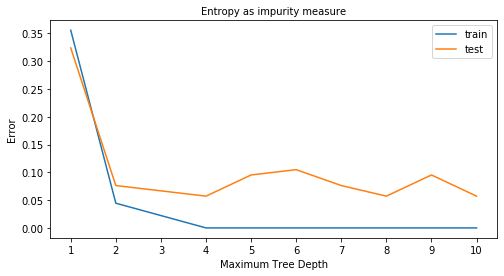

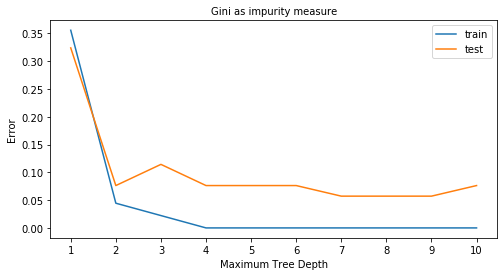

In [48]:
# features: everything except the 'species' column
X = iris.drop('species', axis = 1)

# what are we trying to predict?
y = iris['species']

# split data: 30% will be training data and 70% - test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 101)

MaxDepth = 10

def fit_for_var_depth_trees (X_train, y_train, X_test, y_test, criterion_):
    Errors = np.zeros((MaxDepth,2))
    Accuracy = np.zeros(MaxDepth)
    print ("{:^20}{:^20}{:^20}{:^20}".format('Max Depth','Training error','Test error', 'Accuracy'))

    for i in range(0,MaxDepth):
        tree = DecisionTreeClassifier(criterion=criterion_, max_depth=i+1)
        tree.fit(X_train, y_train)

        # tree.score returns the mean accuracy on the given test data and labels 
        # find errors
        Errors[i,0] = 1 - tree.score(X_train,y_train)
        Accuracy[i] = tree.score(X_test,y_test)
        Errors[i,1] = 1 - Accuracy[i]

        
        print("{:^20d}{:^20f}{:^20f}{:^20f}".format(i+1, Errors[i,0], Errors[i,1], Accuracy[i]))
    return Errors, tree

# text format 
bold_start = "\033[1m"
bold_end = "\033[0;0m"

# implement 'entropy' as impurity measure and fit the model
print ('\n'+bold_start + 'Entropy as impurity measure'+ bold_end+ '\n')
ErrorsE, treeE = fit_for_var_depth_trees (X_train, y_train, X_test, y_test, 'entropy') 

# implement 'gini' as impurity measure and fit the model
print ('\n'+bold_start + 'Gini as impurity measure'+ bold_end+ '\n')
ErrorsG, treeG = fit_for_var_depth_trees (X_train, y_train, X_test, y_test, 'gini')

# plot errors by tree depth    
def plot_errors_by_tree_depth(title, Errors):
    plt.close('all')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
    ax.set_xlabel('Maximum Tree Depth')
    ax.set_ylabel('Error')
    ax.set_title(title, fontsize ='medium')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
    ax.legend(loc='upper right', fontsize='medium')
    plt.show() 
    
plot_errors_by_tree_depth('Entropy as impurity measure', ErrorsE)
plot_errors_by_tree_depth('Gini as impurity measure', ErrorsG)

<h3> Discussion</h3>
<p> We analyzed the results of decision trees of different depths and criterions. We can say that at tree level 2 test and train error ate same, then test error started decreasing till level 3. And starting from depth 4 test error is little higher than the train error. Maximum test accuracy is  98.7%. This is a very good accuracy. But we should also consider sizes of training and testing sets. We chose it to be 50/50. However, usually training data is smaller than testing. 
    <br><br>Both Gini Impurity and Entropy are criteria to split a node in a decision tree. The entropy and gini measures gave exact same accuracy results in our case. Even displaying both trees show that at each level same features were chosen by sklearn. Therefore, in this case we cannot choose a better performing measure.
    <br><br>Also, I tried to resplit data and leave 70% for testing data. When we use Information Gain that uses Entropy as the base calculation, we have a wider range of results.
    <br><br> 
    After getting this result I did some online research trying to figure out when it is better to use entropy/gini, and which one is a more effective impurity measure. I found a paper "Theoretical comparison between the Gini Index and
Information Gain criteria" written by L. Raileanu and K. Stoffel. They say that "they [gini and entropy] disagree only in 2% of all cases, which explains why most previously published empirical results concluded that it is not possible to decide which one of the two tests performs better."<br><br>